# Zachary's Karate Club Split

-------------------------------------------------

The raw code for this Jupyter notebook is by default hidden for easier reading. The main focus of this particular page of the notebook is on the graphs and their interpretation. To toggle on/off the raw code, click below:

In [2]:
# Setup Code toggle button
from IPython.core.display import HTML  

HTML(''' 
<center><h3>
<a href="javascript:code_toggle()">Talk is cheap, show me the code.</a>
</center></h3>
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
''')

In [3]:
# NetworkX gets warnings about deprececated Matplotlib libs
import warnings
warnings.filterwarnings('ignore')

# Setup notebook theme
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme(get_themes()[1])

&nbsp;

## The Problem

We know the result of the [Karate Club (Zachary, 1977)](http://aris.ss.uci.edu/~lin/76.pdf) split. Prove or disprove that the result of split could have been predicted by the weighted graph of social interactions.  How well does the mathematical model represent reality?

* Original paper
  * [http://aris.ss.uci.edu/~lin/76.pdf](http://aris.ss.uci.edu/~lin/76.pdf)
* Slides
  * [http://www-personal.umich.edu/~ladamic/courses/networks/si614w06/ppt/lecture18.ppt](http://www-personal.umich.edu/~ladamic/courses/networks/si614w06/ppt/lecture18.ppt)
  * [http://clair.si.umich.edu/si767/papers/Week03/Community/CommunityDetection.pptx](http://clair.si.umich.edu/si767/papers/Week03/Community/CommunityDetection.pptx)
* Code and data
  * [https://networkx.readthedocs.io/en/stable/examples/graph/karate_club.html](https://networkx.readthedocs.io/en/stable/examples/graph/karate_club.html)
  * [http://nbviewer.ipython.org/url/courses.cit.cornell.edu/info6010/resources/11notes.ipynb](http://nbviewer.ipython.org/url/courses.cit.cornell.edu/info6010/resources/11notes.ipynb)
  * [http://stackoverflow.com/questions/9471906/what-are-the-differences-between-community-detection-algorithms-in-igraph/9478989#9478989](http://stackoverflow.com/questions/9471906/what-are-the-differences-between-community-detection-algorithms-in-igraph/9478989#9478989)
  * [http://stackoverflow.com/questions/5822265/are-there-implementations-of-algorithms-for-community-detection-in-graphs](http://stackoverflow.com/questions/5822265/are-there-implementations-of-algorithms-for-community-detection-in-graphs)
  * [http://konect.uni-koblenz.de/networks/ucidata-zachary](http://konect.uni-koblenz.de/networks/ucidata-zachary)
  * [http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary)
  * [https://snap.stanford.edu/snappy/doc/reference/CommunityGirvanNewman.html](https://snap.stanford.edu/snappy/doc/reference/CommunityGirvanNewman.html)
  * [http://igraph.org/python/doc/igraph-pysrc.html#Graph.community_edge_betweenness](http://igraph.org/python/doc/igraph-pysrc.html#Graph.community_edge_betweenness)

## Visual Analysis Recap

In [part one](http://datenstrom.gitlab.io/cs532-s17/notebooks/karate_club.html) the data was explored and graphed using various methods. The result was the graph shown below. It displays the degree of each node based on node size and the weight of each edge based on the color scale as well as line style. Edges which are in the lowest $33\%$ are dotted, the middle dashed and the top solid. The result of the split is also shown based on node color.

The code from part one has been converted into the [kgraph.py](kgraph.py) module which provides the `Kclub` class. This class contains all of the data about the group and has a `graph()` method which will display the graph that was produced.

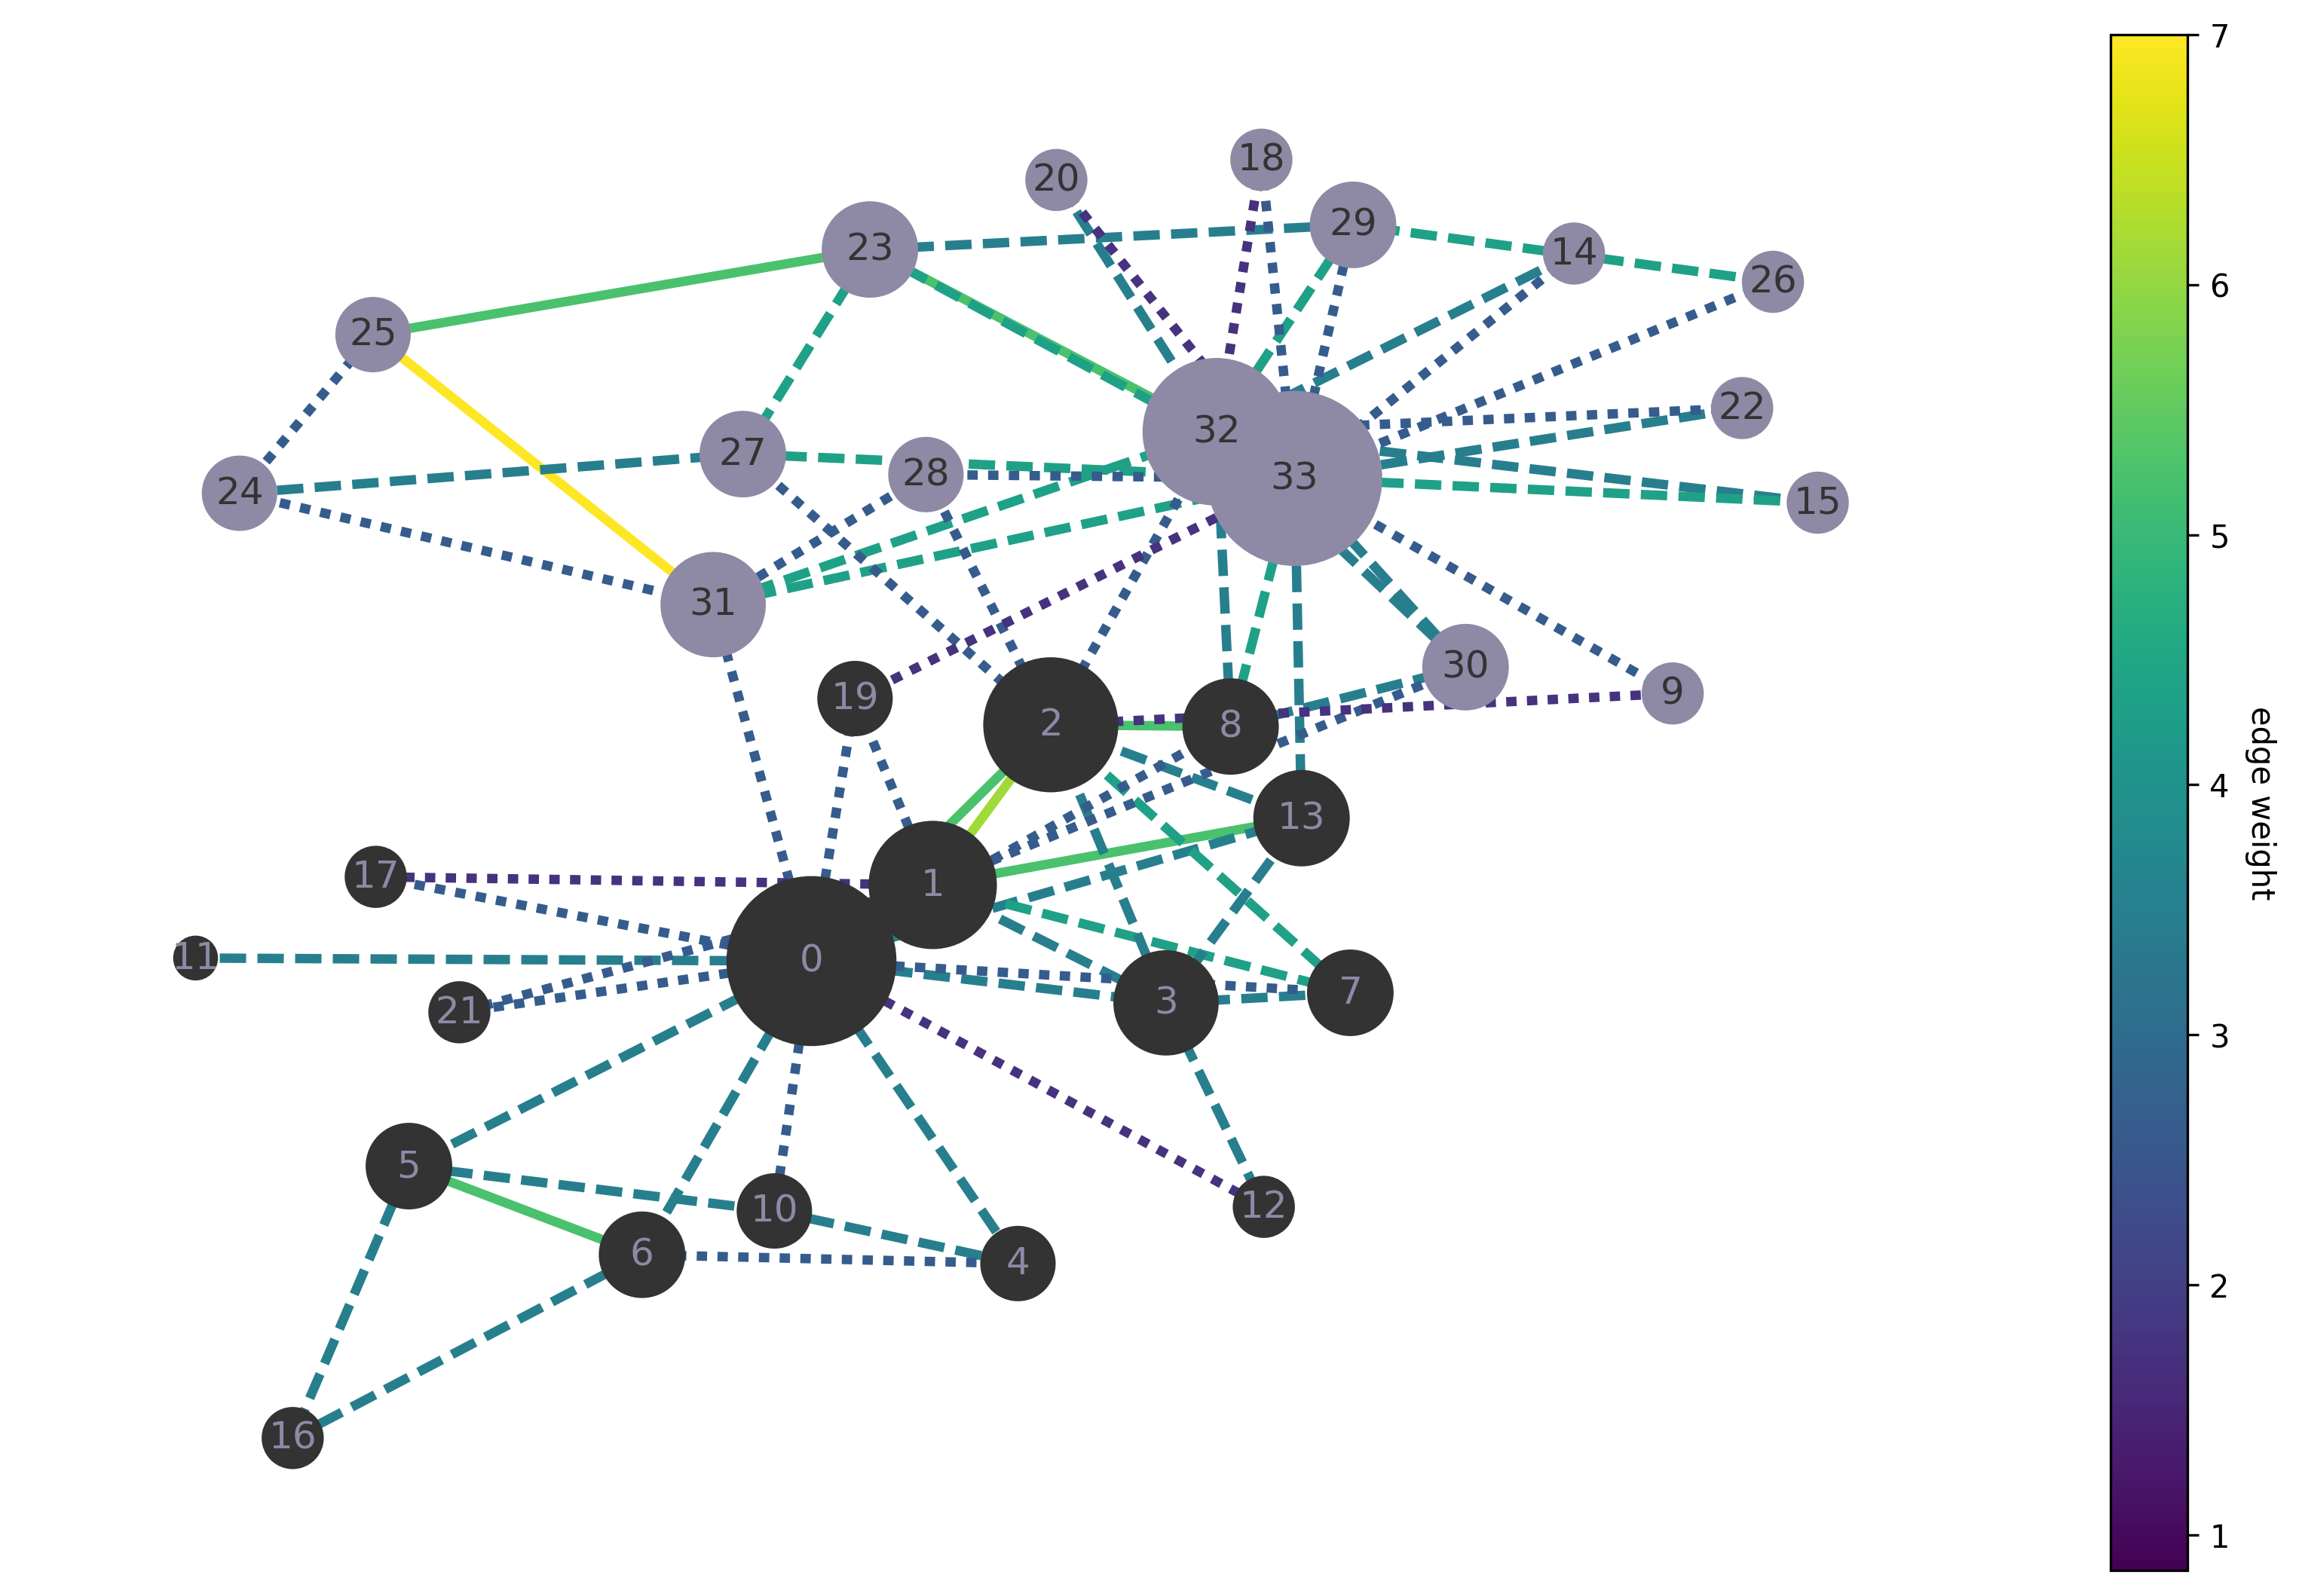

In [4]:
from kgraph import Kclub

Kclub().graph()

## Mathematical Analysis

The data and therefore the model is entirely based on observed friendship between members. The individuals in the network will be represented by $V$. For data we have two $32\times32$ matrices, which for continutity with the [original paper](http://aris.ss.uci.edu/~lin/76.pdf) will be refered to in text with the same variable names. The _existance matrix_ $E$ is a representation of the existing relationships between members in the group. Each row respresents a person, the index of the row will be the persons unique identifier. Each column also represents a group memeber and the value of the column for any given row contains a $1$ if they interacted with the person outside of group events and a $0$ if they did not. Because a person may not interact with themselves it will never be true that $E_{jk}$ is equal to $1$ when $j\,=\,k$.

$$
\begin{matrix}
    0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
    1 & 1 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 1 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    1 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 1 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 \\
\end{matrix}
$$

#### Capicitated Networks: not all friendships are equal

While this data allows for some analysis knowing the strength of each friendship, or edge, is much better. Information flow through the network takes place along the edges, a stronger connection allowing for more information and by extension influence. Quantifying the connection would give the basis for a mathematical model to determine which connections would be severed in the case of a split in the group. The _capacity matrix_ $C$ represents this metric.

\begin{matrix}
    0 & 4 & 5 & 3 & 3 & 3 & 3 & 2 & 2 & 0 & 2 & 3 & 1 & 3 & 0 & 0 & 0 & 2 & 0 & 2 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 0 \\
    4 & 0 & 6 & 3 & 0 & 0 & 0 & 4 & 0 & 0 & 0 & 0 & 0 & 5 & 0 & 0 & 0 & 1 & 0 & 2 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 0 & 0 \\
    5 & 6 & 0 & 3 & 0 & 0 & 0 & 4 & 5 & 1 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 2 & 0 & 0 & 0 & 2 & 0 \\
    3 & 3 & 3 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 3 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    3 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    3 & 0 & 0 & 0 & 0 & 0 & 5 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    3 & 0 & 0 & 0 & 2 & 5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    2 & 4 & 4 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    2 & 0 & 5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 3 & 4 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 \\
    2 & 0 & 0 & 0 & 3 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    3 & 5 & 3 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 2 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 4 \\
    0 & 0 & 0 & 0 & 0 & 3 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 2 \\
    2 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 1 \\
    2 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 3 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 5 & 0 & 4 & 0 & 3 & 0 & 0 & 5 & 4 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 3 & 0 & 0 & 0 & 2 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 5 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 7 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4 & 0 & 0 & 0 & 2 \\
    0 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4 \\
    0 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 2 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 4 & 0 & 0 & 0 & 0 & 0 & 4 & 2 \\
    0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 & 3 \\
    2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 7 & 0 & 0 & 2 & 0 & 0 & 0 & 4 & 4 \\
    0 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 3 & 0 & 0 & 0 & 0 & 0 & 3 & 3 & 0 & 0 & 1 & 0 & 3 & 0 & 2 & 5 & 0 & 0 & 0 & 0 & 0 & 4 & 3 & 4 & 0 & 5 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4 & 2 & 0 & 0 & 0 & 3 & 2 & 4 & 0 & 0 & 2 & 1 & 1 & 0 & 3 & 4 & 0 & 0 & 2 & 4 & 2 & 2 & 3 & 4 & 5 & 0 \\
\end{matrix}

It is nearly the same as $E$ but now each edge has a positve value if the people interact with its value equal to the number of interactions that were observed.

&nbsp;

In [ ]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="dot")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()